In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.manifold import TSNE
import time



# Load the data

In [2]:
year='../data/datasetsFinalaizedForEDA/dataset_1921-2020_2000samples.csv'
df_new=pd.read_csv('../data/intermediate datasets-ToBeUsedForRanking/df_1921-2020_new.csv')
new_dataframe_name="../data/intermediate datasets-ToBeUsedForRanking/df_1921-2020_new.csv"


In [3]:
def load(year):
    df=pd.read_csv(year)
    return df

#df_2019=pd.read_csv('../data/datasets_top50-2019.csv',encoding='latin-1')


In [4]:
load(year)

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,25-09-1928,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.645,['The Clovers'],0.519,153533,0.0825,0.000000,8,0.1010,-14.650,1,Fool Fool Fool,14,1959,0.0380,78.755,0.7540,1959
1996,0.671,['Ricky Nelson'],0.700,132200,0.7380,0.000004,8,0.2210,-11.116,1,Just A Little Too Much - Remastered,20,01-01-1959,0.0350,91.659,0.9680,1959
1997,0.740,"['The Stanley Brothers', 'The Clinch Mountain ...",0.505,159507,0.2860,0.000000,10,0.3330,-11.885,1,This Wicked Path Of Sin,11,1959,0.0361,172.370,0.4480,1959
1998,0.486,['Art Pepper'],0.711,316227,0.2550,0.043600,5,0.0871,-11.397,1,Walkin' - Original Take,17,01-01-1959,0.0465,114.082,0.4110,1959


In [5]:
df=load(year)

# data properties

In [6]:
def data_properties(year):
    print("properties for year are as follows :\n")
    print("column details:\n")
    print(year.columns)
    print("shape:\n")
    print(year.shape)
    print("info about dataset:\n")
    print(year.info())
    print("\n")


In [7]:
data_properties(df)

properties for year are as follows :

column details:

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')
shape:

(2000, 17)
info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2000 non-null   float64
 1   artists           2000 non-null   object 
 2   danceability      2000 non-null   float64
 3   duration_ms       2000 non-null   int64  
 4   energy            2000 non-null   float64
 5   instrumentalness  2000 non-null   float64
 6   key               2000 non-null   int64  
 7   liveness          2000 non-null   float64
 8   loudness          2000 non-null   float64
 9   mode             

### Initial calculations on data

#### checking if any value is null in the data 

In [8]:
def checkfornull(year):
    print("cheking for null values......")
    print(year.columns[year.isnull().any()])
    output=year.isnull().sum()
    return output 

In [9]:
checkfornull(df)

cheking for null values......
Index([], dtype='object')


acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

#### convert the non float data to float data type

In [10]:
# in the data we obsrve that all the data is not in float .So , in order to maintain a symetry,we will 
# convert the non float data to float data type

def float_conversion(column,value):
    column= pd.to_numeric(value, downcast="float")
    return column


In [11]:
def execute_float_conversion():
    float_conversion(df.mode,df["mode"])
    float_conversion(df.duration_ms,df["duration_ms"])
    
    return df.head()


In [12]:
execute_float_conversion()

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,25-09-1928,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


sort the songs on the bases of important parametes like :

In [13]:
def sort_imp_parameters():
    return df[['name','artists','danceability','valence','tempo','tempo_rate','energy']].sort_values(by=["danceability","energy","valence"],ascending=False).head(10)

As we can see that these features collectively couldn't generate the sorted manner of artist as expected.We need to change our approach and include more features 


#### Analysing top artists
Analysing Top artists will give us a better idea about the feature importance 

In [14]:
#count the value:in terms on songs per year for an  artist
def songs_per_artist():
    print("Artist\t\tSongs\n")
    print(df["artists"].value_counts().head(20))

In [15]:
songs_per_artist()

Artist		Songs

['Эрнест Хемингуэй']                           51
['Эрих Мария Ремарк']                          28
['Miles Davis']                                20
['Francisco Canaro', 'Charlo']                 18
['Francisco Canaro']                           17
['Orchestra Studio 7']                         17
['Frédéric Chopin', 'Vladimir Horowitz']       16
['Sinclair Lewis', 'Frank Arnold']             16
['Unspecified']                                16
['Ignacio Corsini']                            14
['Suraiya']                                    12
['Judy Garland']                               11
['Oscar Peterson']                             11
['Johann Sebastian Bach', 'Glenn Gould']       11
['Seweryn Goszczyński']                        10
['Franz Joseph Haydn', 'Pro Arte Quartet']     10
['Lata Mangeshkar']                            10
['Giuseppe Verdi', 'Arturo Toscanini']         10
['Johann Sebastian Bach', 'Jascha Heifetz']     9
['Duke Ellington']                 

In [16]:
df.reset_index()

,index,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,25-09-1928,0.0926,108.003,0.7200,1928
4,4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,0.645,['The Clovers'],0.519,153533,0.0825,0.000000,8,0.1010,-14.650,1,Fool Fool Fool,14,1959,0.0380,78.755,0.7540,1959
1996,1996,0.671,['Ricky Nelson'],0.700,132200,0.7380,0.000004,8,0.2210,-11.116,1,Just A Little Too Much - Remastered,20,01-01-1959,0.0350,91.659,0.9680,1959
1997,1997,0.740,"['The Stanley Brothers', 'The Clinch Mountain ...",0.505,159507,0.2860,0.000000,10,0.3330,-11.885,1,This Wicked Path Of Sin,11,1959,0.0361,172.370,0.4480,1959
1998,1998,0.486,['Art Pepper'],0.711,316227,0.2550,0.043600,5,0.0871,-11.397,1,Walkin' - Original Take,17,01-01-1959,0.0465,114.082,0.4110,1959


# EDA

in EDA approach we  try to  analyze data sets to summarize their main characteristics, often with visual methods  and  then Have a good understanding of data quality.. 
but to come to any conclusions and to decide weather A statistical model can be used we need to dig deeper into data

And so we did the best we could do with  EDA  for seeing what the data can tell us beyond the formal modeling or  any hypothesis testing task.

We did the a lot of  comparisions  amongst multiple features and here's a few of our results.


### Plot correlation matrix

In [17]:
def plot_correlation():
    correlation = df[['acousticness','danceability','energy','instrumentalness','liveness','tempo','valence',
                           'loudness']]
    plt.figure(figsize=(12,8))
    sns.heatmap(correlation.corr(), annot=True,cmap="coolwarm");

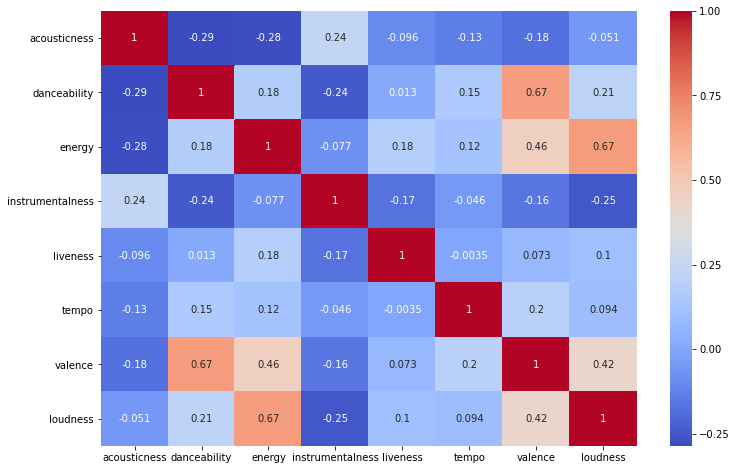

In [18]:
plot_correlation()

We can observe that there is a correlation between the loudness and the perceived energy of the song. The jointplots indicate a correlation between these two. Lets understand  how much one feature si impacted by another feature 

In [19]:
# store mean values of above features
a=df['danceability'].mean()
b=df['energy'].mean()
c=df['loudness'].mean()
d=df['acousticness'].mean()
e=df['valence'].mean()
f=df['tempo'].mean()


 # Create a popularity column

So, now if u see we crearted a new feature a.ka popularity adn did our comuputation to device if popularity is 1 or 0 for a song.And for better outcomes we have a graph here in which you an see the distribution of data around meen .For popularity 0 the distribution is scattereed  but for popularity 1 cateogary we have the danceability data around mean and not scaterred too much.
Similarly we did comparisions for other featurees.

In [20]:

#dance ,valence , energy , liveliness

def popularity_binary():
    if  'popularity'  not in df.columns:
         df["popularity"]=""
         df.loc[(df['danceability']>=a) | (df['energy']>=b)| (df['loudness']>=c)| (df['acousticness']>=d)| 
                        (df['valence']>=e)| (df['tempo']>=f),'popularity']='1'
         df.loc[(df['danceability']<a) & (df['energy']<b) & (df['loudness']<c),'popularity']='0'
         df.head()

         df.to_csv(new_dataframe_name,index=False)
           
    else:
        pass
        

In [21]:
popularity_binary()

In [22]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,25-09-1928,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


# validating model 

## plot loudness t-SNE

In [23]:
def plot_pca_scaler(y,dataframe):
    features = ["energy", "liveness", "tempo", "valence", "loudness","danceability"]

    text1 = dataframe["artists"] + " - " + dataframe["name"]
    text2 = text1.values
    
    X = dataframe[features].values
    y = dataframe[y].values

    minmaxscaler = MinMaxScaler()
    X = minmaxscaler.fit_transform(X)

    print('t-SNE starting.................')
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X)

    print('......................t-SNE done')

    fig = {
        "data": [
            {
                "x": tsne_results[:, 0],
                "y": tsne_results[:, 1],
                "text": text2,
                "mode": "markers",
                "marker": {"size": 8, "color": y}
            }
        ],
        "layout": {
            "xaxis": {"title": "x-tsne"},
            "yaxis": {"title": "y-tsne"}
        }
    }

    return py.iplot(fig, filename="amit")

In [24]:
plot_pca_scaler("loudness",df)

t-SNE starting.................
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.013s...
[t-SNE] Computed neighbors for 2000 samples in 0.242s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.104349
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.549812
[t-SNE] KL divergence after 300 iterations: 1.258632
......................t-SNE done


## project the 'top' and 'bottom' songs (or 'not-top' songs) 

project into the t-SNE space and see if they cluster differently.

1. separate the songs on the basis of popularity--> o and 1 , here 0  are the not top songs and 1 are top songs

- EXPECTED 1: Songs having popularity 1 should be tightly coupled  and 

- EXPECTED 2: Songs having popularity 0 should be loosely coupled  

In [25]:
def top_songs(dataframe):
    df1 = dataframe[dataframe['popularity'] == 1]
    return plot_pca_scaler("loudness",df1)

In [26]:
top_songs(df)

t-SNE starting.................
[t-SNE] Computing 88 nearest neighbors...
[t-SNE] Indexed 89 samples in 0.000s...
[t-SNE] Computed neighbors for 89 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 89 / 89
[t-SNE] Mean sigma: 0.381986
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.742554
[t-SNE] KL divergence after 300 iterations: 2.511476
......................t-SNE done


In [27]:
def not_top_songs(dataframe):
    df2 = dataframe[dataframe['popularity'] ==0 ]
    return plot_pca_scaler("loudness",df2)

In [28]:
not_top_songs(df)

t-SNE starting.................
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1279 samples in 0.003s...
[t-SNE] Computed neighbors for 1279 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1279
[t-SNE] Computed conditional probabilities for sample 1279 / 1279
[t-SNE] Mean sigma: 0.119170
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.069016
[t-SNE] KL divergence after 300 iterations: 1.043272
......................t-SNE done
